In [28]:
import numpy as np

import dismech

b = 0.02
h = 0.001

geom = dismech.GeomParams(rod_r0=0.001,
                          shell_h=0,
                          axs=b*h,
                          ixs1=b*h**3/12,
                          ixs2=h*b**3/12,
                          jxs=b*h**3/6)

material = dismech.Material(density=1200,
                            youngs_rod=2e6,
                            youngs_shell=0,
                            poisson_rod=0.5,
                            poisson_shell=0)

static_2d_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=True,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=25,
                                  total_time=1.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
env.add_force('viscous', ct=0.01, cn=0.01)
#env.set_static()   

geo = dismech.Geometry.from_txt('input.txt')

robot = dismech.SoftRobot(geom, material, geo, static_2d_sim, env)

In [29]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()
qs = np.stack([robot.state.q for robot in robots])

In [30]:
# Plot DOF vector on plotly
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(y_lim=[-0.01, 0.01],
                  title='Viscous Fall (N=3)')
fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

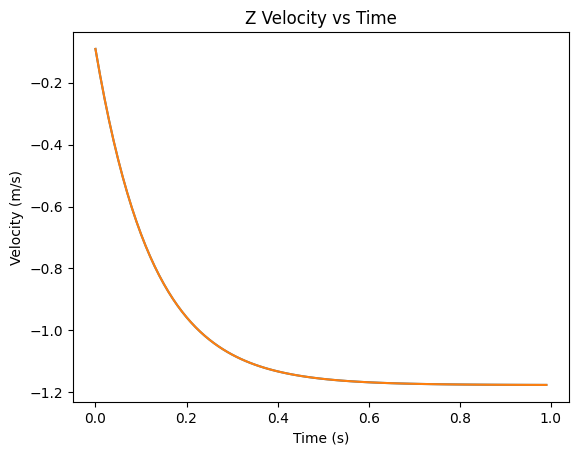

In [31]:
import matplotlib.pyplot as plt
us = np.stack([robot.state.u for robot in robots])
plt.plot(t, us[:, 2:robot.end_node_dof_index:3])
plt.title("Z Velocity vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.show()